<a href="https://colab.research.google.com/github/Nouvalgt/awikwok/blob/main/Fiks%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

In [ ]:
# linear algebra
import numpy as np
# data processing
import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.stats import skew, norm, probplot
from scipy.stats import skew, kurtosis
from scipy import stats
# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Melakukan import dataset "Seoul Bike".
# Baca dataset
df = pd.read_csv("/content/drive/MyDrive/awikwok/SeoulBikeData.csv", encoding='latin-1') # Try 'latin-1' encoding
# If 'latin-1' doesn't work, you may need to experiment with other encodings like 'ISO-8859-1'

In [ ]:
# Menampilkan beberapa baris pertama dari dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Menampilkan struktur dataset
print("\nStruktur dataset:")
df.info()


Struktur dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            87

In [ ]:
# Mengecek missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


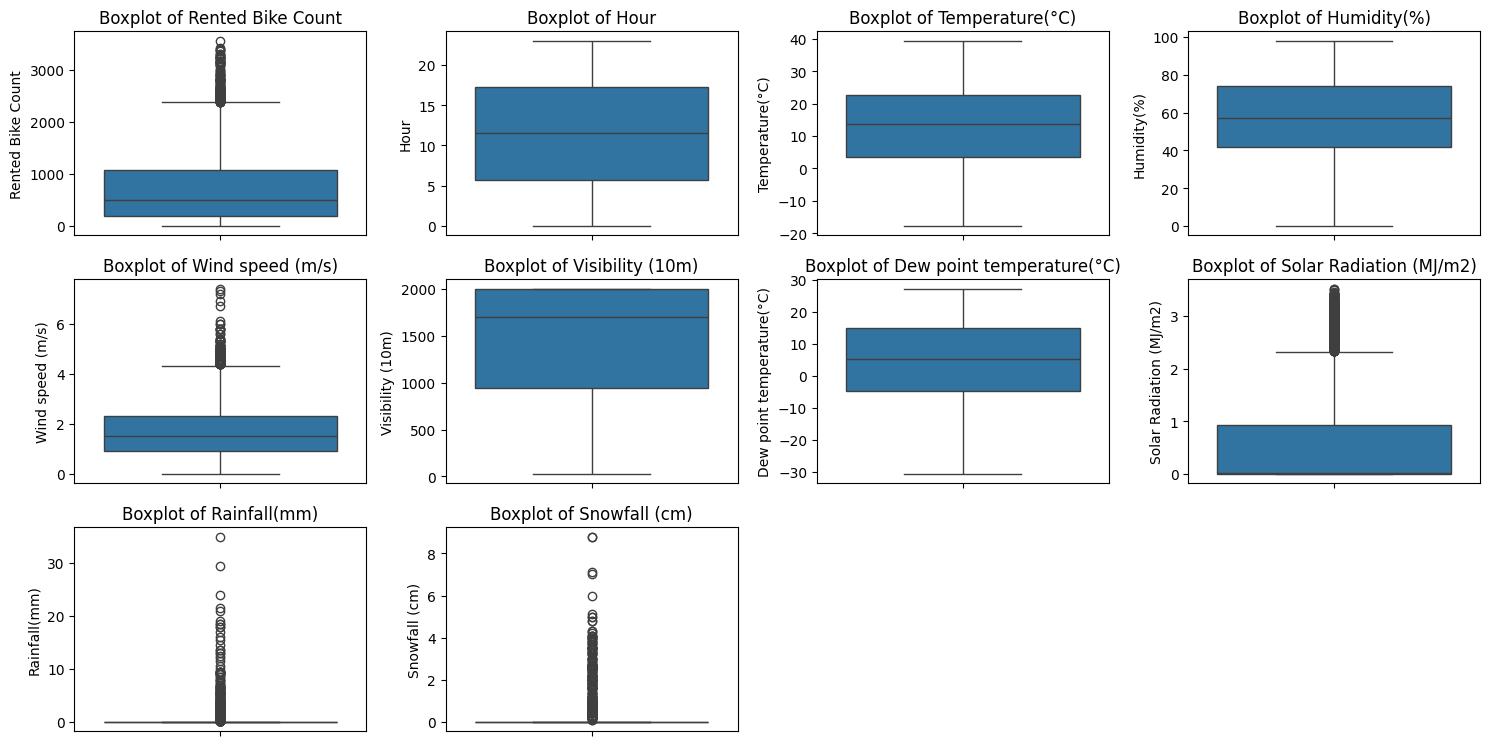

Jumlah outlier di setiap kolom:
Rented Bike Count          158
Wind speed (m/s)           161
Solar Radiation (MJ/m2)    641
Rainfall(mm)               528
Snowfall (cm)              443
dtype: int64


In [ ]:
# Memilih hanya atribut numerik
numeric_cols = df.select_dtypes(include='number')

# Menghitung IQR untuk setiap kolom
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Mengidentifikasi outlier
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))

# Mengecek outliers dengan menggunakan boxplot
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Menampilkan jumlah outlier di setiap kolom
outlier_counts = outliers.sum()
print("Jumlah outlier di setiap kolom:")
print(outlier_counts[outlier_counts > 0])


In [ ]:
# Mengecek unique values
unique_values = df.nunique()
print("Unique values per column:\n", unique_values)

Unique values per column:
 Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64


penanganan dan distribusi

In [ ]:
# Mengubah kolom Tanggal menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [ ]:
# Menambahkan kolom tambahan untuk analisis yang lebih baik
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek


eksplorasi data

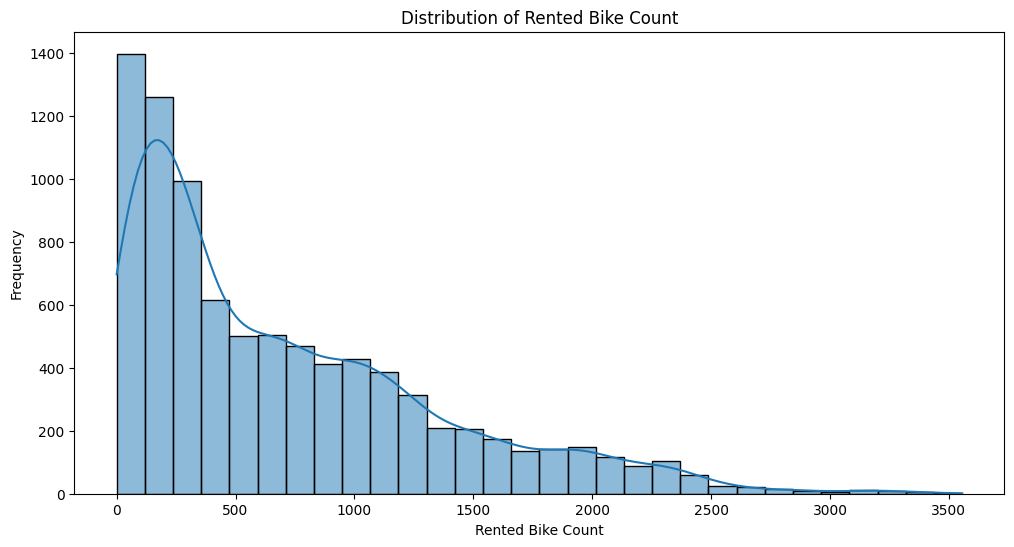

In [ ]:
# Distribusi Jumlah Sepeda Sewaan
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(df['Rented Bike Count'], bins=30, kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()


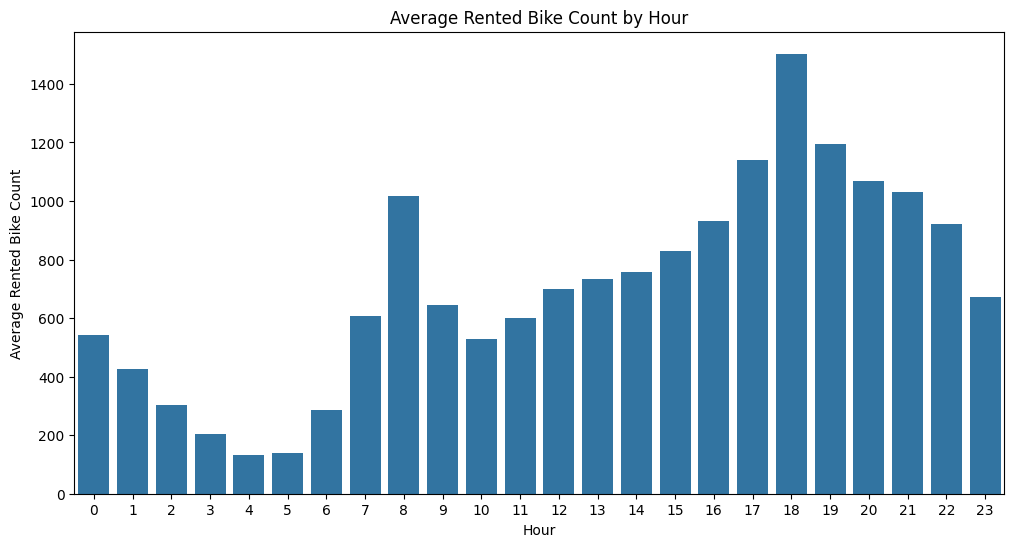

In [ ]:
# Rented Bike Count by Hour (Bar Chart)
plt.figure(figsize=(12, 6))
hourly_data = df.groupby('Hour')['Rented Bike Count'].mean().reset_index()
sns.barplot(x='Hour', y='Rented Bike Count', data=hourly_data)
plt.title('Average Rented Bike Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rented Bike Count')
plt.show()


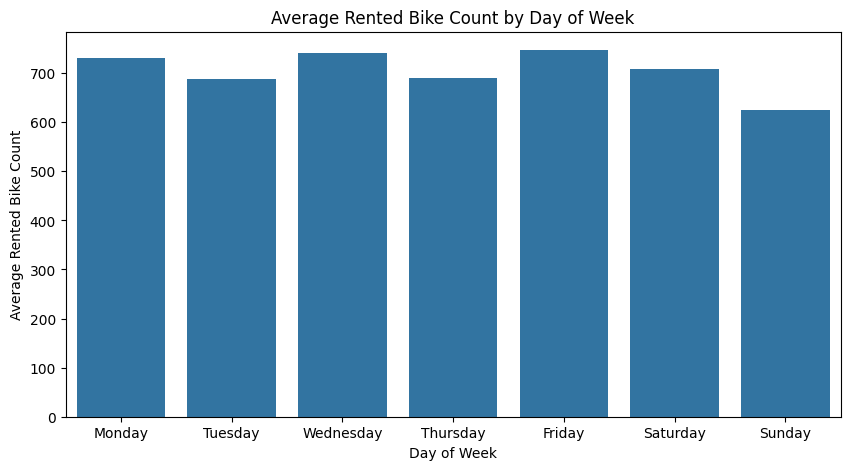

In [ ]:
# Rented Bike Count by Day of Week (Bar Chart)
plt.figure(figsize=(10, 5))
daily_data = df.groupby('DayOfWeek')['Rented Bike Count'].mean().reset_index()
sns.barplot(x='DayOfWeek', y='Rented Bike Count', data=daily_data)
plt.title('Average Rented Bike Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Rented Bike Count')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


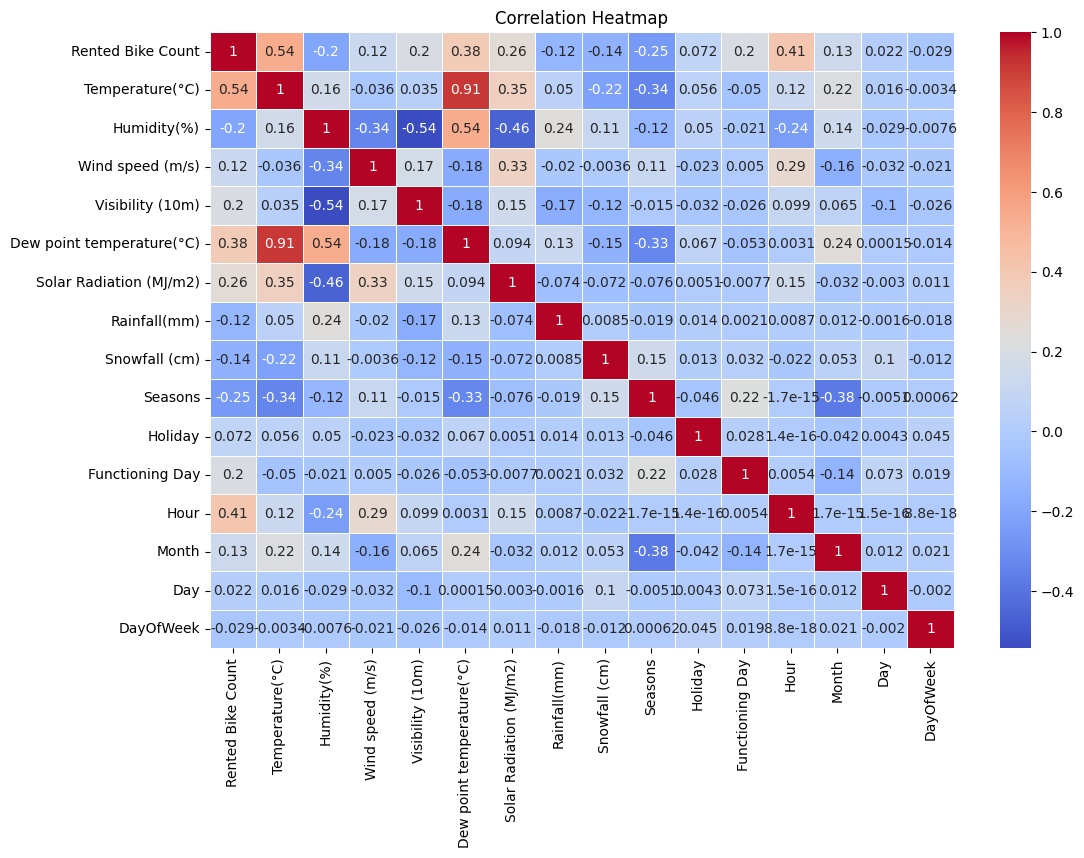

Korelasi dengan 'Rented Bike Count':
 Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Functioning Day              0.203943
Visibility (10m)             0.199280
Month                        0.133514
Wind speed (m/s)             0.121108
Holiday                      0.072338
Day                          0.022291
DayOfWeek                   -0.029357
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Seasons                     -0.253058
Name: Rented Bike Count, dtype: float64


In [ ]:
# Encode 'Seasons', 'Holiday', and 'Functioning Day'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Seasons'] = label_encoder.fit_transform(df['Seasons'])
df['Holiday'] = label_encoder.fit_transform(df['Holiday'])
df['Functioning Day'] = label_encoder.fit_transform(df['Functioning Day'])

# Select only numerical columns for correlation matrix
numerical_cols = ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
                  'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
                  'Seasons', 'Holiday', 'Functioning Day', 'Hour', 'Month', 'Day', 'DayOfWeek']

plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Melihat korelasi dengan 'Rented Bike Count'
bike_corr = correlation_matrix["Rented Bike Count"].sort_values(ascending=False)
print("Korelasi dengan 'Rented Bike Count':\n", bike_corr)


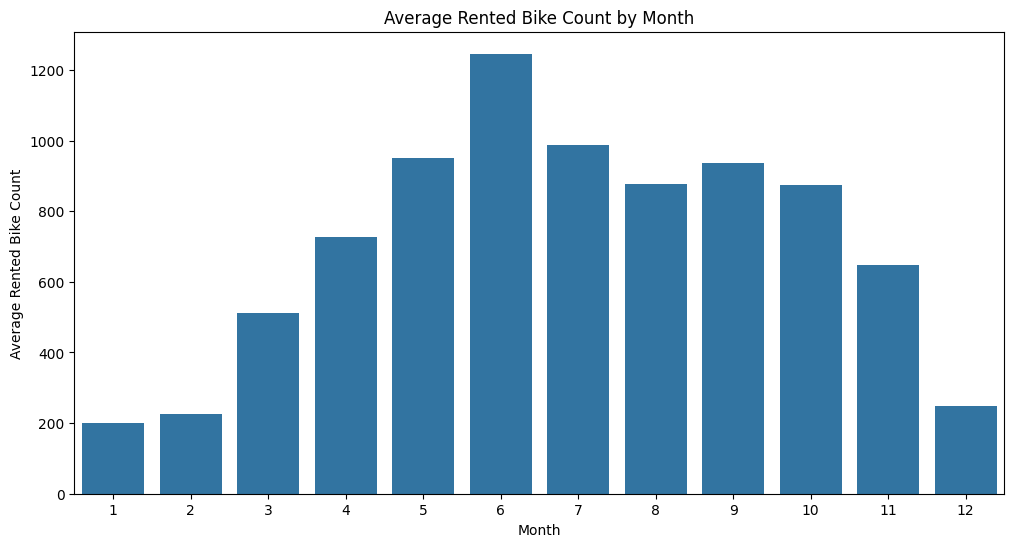

In [ ]:
# Rented Bike Count by Month (Bar Chart)
plt.figure(figsize=(12, 6))
monthly_data = df.groupby('Month')['Rented Bike Count'].mean().reset_index()
sns.barplot(x='Month', y='Rented Bike Count', data=monthly_data)
plt.title('Average Rented Bike Count by Month')
plt.xlabel('Month')
plt.ylabel('Average Rented Bike Count')
plt.show()


In [ ]:
# Display the first few rows of the dataset to verify
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,DayOfWeek
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,12,1,4
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,12,1,4
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,12,1,4
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,12,1,4
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,12,1,4


Data Preparation

In [ ]:
# Menangani Outliers menggunakan IQR
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1

# Identifikasi outliers dan hapus dari DataFrame asli
outliers = ((numerical_cols < (Q1 - 1.5 * IQR)) | (numerical_cols > (Q3 + 1.5 * IQR))).any(axis=1)
df_cleaned = df.loc[~outliers].copy()

# Normalisasi Data
scaler = StandardScaler()
numerical_cols_cleaned = df_cleaned.select_dtypes(include=['float64', 'int64'])
df_cleaned.loc[:, numerical_cols_cleaned.columns] = scaler.fit_transform(numerical_cols_cleaned)

# Encode 'Seasons', 'Holiday', and 'Functioning Day'
label_encoder = LabelEncoder()
df_cleaned['Seasons'] = label_encoder.fit_transform(df_cleaned['Seasons'])
df_cleaned['Holiday'] = label_encoder.fit_transform(df_cleaned['Holiday'])
df_cleaned['Functioning Day'] = label_encoder.fit_transform(df_cleaned['Functioning Day'])


In [ ]:
from sklearn.model_selection import train_test_split

# Mendefinisikan kolom fitur dan variabel target
feature_cols = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
                'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
                'Seasons', 'Holiday', 'Functioning Day', 'Month', 'Day', 'DayOfWeek']
target_col = 'Rented Bike Count'

# Binarkan variabel target: 1 jika Jumlah Sepeda Sewaan > ambang batas, jika tidak 0
threshold = df_cleaned[target_col].mean()
df_cleaned['High Demand'] = (df_cleaned[target_col] > threshold).astype(int)

# Memisahkan data
X = df_cleaned[feature_cols]
y = df_cleaned['High Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Selanjutnya: Pengembangan Model (Modeling)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih modelnya
rf_model.fit(X_train, y_train)

# Membuat prediksi
rf_y_pred = rf_model.predict(X_test)

# Evaluasi modelnya
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

print(f'Random Forest Accuracy: {rf_accuracy}')
print('Random Forest Classification Report:')
print(rf_report)
print('Random Forest Confusion Matrix:')
print(rf_conf_matrix)


Random Forest Accuracy: 0.9376971608832808
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       749
           1       0.93      0.91      0.92       519

    accuracy                           0.94      1268
   macro avg       0.94      0.93      0.94      1268
weighted avg       0.94      0.94      0.94      1268

Random Forest Confusion Matrix:
[[716  33]
 [ 46 473]]


In [ ]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model
lr_model = LogisticRegression(random_state=42)

# Latih modelnya
lr_model.fit(X_train, y_train)

# Membuat prediksi
lr_y_pred = lr_model.predict(X_test)

# Evaluasi modelnya
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_report = classification_report(y_test, lr_y_pred)
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)

print(f'Logistic Regression Accuracy: {lr_accuracy}')
print('Logistic Regression Classification Report:')
print(lr_report)
print('Logistic Regression Confusion Matrix:')
print(lr_conf_matrix)


Logistic Regression Accuracy: 0.8477917981072555
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       749
           1       0.84      0.77      0.81       519

    accuracy                           0.85      1268
   macro avg       0.85      0.84      0.84      1268
weighted avg       0.85      0.85      0.85      1268

Logistic Regression Confusion Matrix:
[[675  74]
 [119 400]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Latih modelnya
knn_model.fit(X_train, y_train)

# Membuat prediksi
knn_y_pred = knn_model.predict(X_test)

# Evaluasi modelnya
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)

print(f'KNN Accuracy: {knn_accuracy}')
print('KNN Classification Report:')
print(knn_report)
print('KNN Confusion Matrix:')
print(knn_conf_matrix)


KNN Accuracy: 0.8564668769716088
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       749
           1       0.88      0.75      0.81       519

    accuracy                           0.86      1268
   macro avg       0.86      0.84      0.85      1268
weighted avg       0.86      0.86      0.85      1268

KNN Confusion Matrix:
[[696  53]
 [129 390]]


In [ ]:
# Cetak ringkasan keakuratan semua model
print(f'Random Forest Accuracy: {rf_accuracy}')
print(f'Logistic Regression Accuracy: {lr_accuracy}')
print(f'KNN Accuracy: {knn_accuracy}')


Random Forest Accuracy: 0.9376971608832808
Logistic Regression Accuracy: 0.8477917981072555
KNN Accuracy: 0.8564668769716088


visulisasi akhir

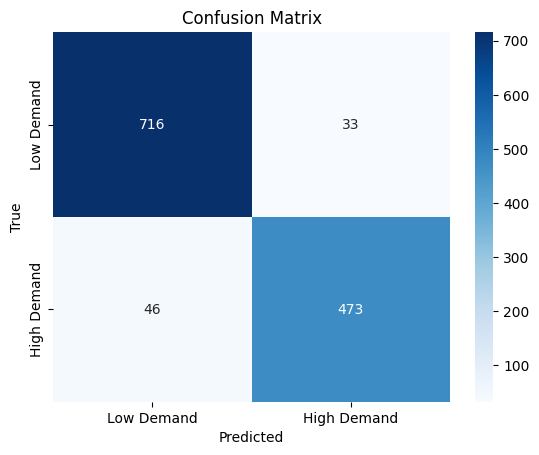

Random Forest Classification Report:
              precision    recall  f1-score   support

  Low Demand       0.94      0.96      0.95       749
 High Demand       0.93      0.91      0.92       519

    accuracy                           0.94      1268
   macro avg       0.94      0.93      0.94      1268
weighted avg       0.94      0.94      0.94      1268



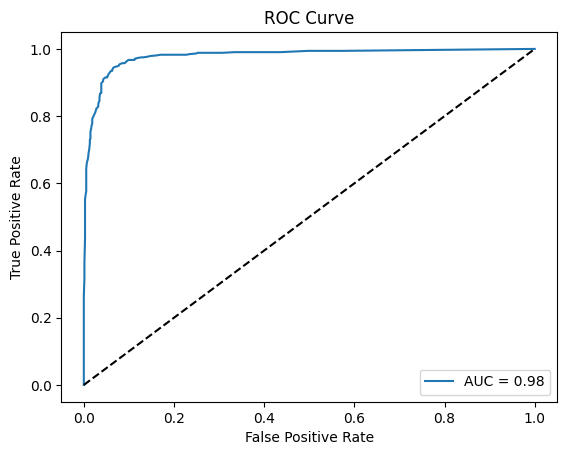

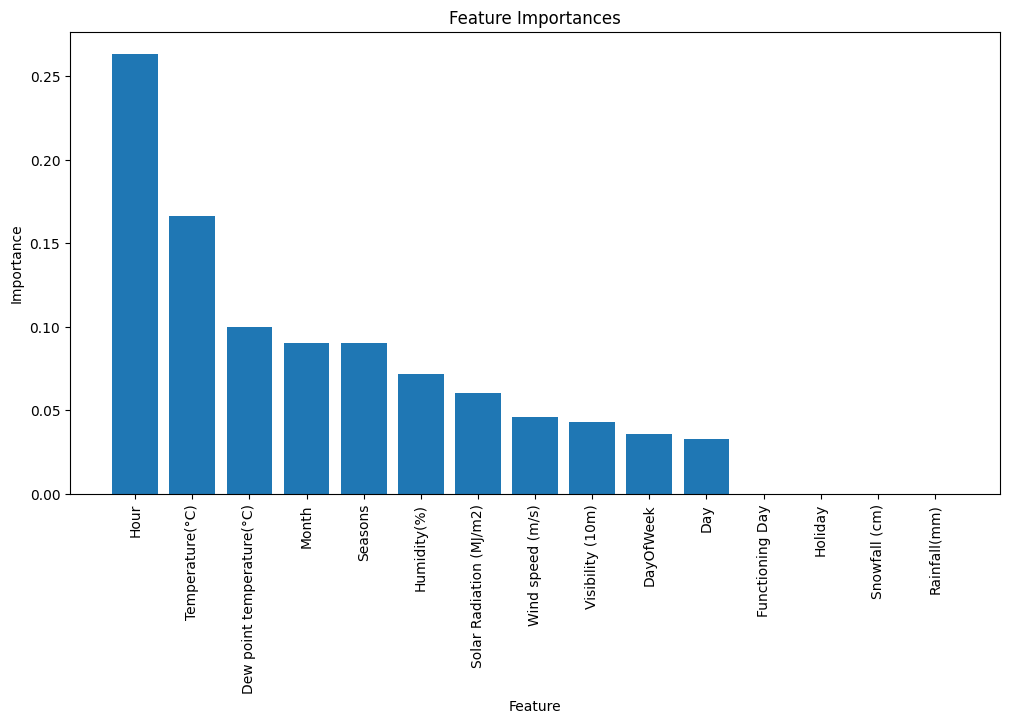

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

# Assuming df_cleaned, X_test, y_test, and rf_model are already defined from the previous code

# Plotting confusion matrix
def plot_confusion_matrix(cm, class_names):
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)
    plt.show()

# Compute confusion matrix
rf_y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, rf_y_pred)
plot_confusion_matrix(cm, class_names=['Low Demand', 'High Demand'])

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred, target_names=['Low Demand', 'High Demand']))

# Plotting ROC curve
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc_score = roc_auc_score(y_true, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Predict probabilities
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, rf_y_pred_proba)

# Plotting feature importance
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title('Feature Importances')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

plot_feature_importance(rf_model, X_test.columns)
